In [70]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [71]:
import os

os.chdir('E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol')
print("Current Working Directory: ", os.getcwd())


Current Working Directory:  E:\MSDSM\AIH_Project\Labs\project2\PAMAP2_Dataset\protocol


In [72]:
# Load data
list_of_files = ['E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject101.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject102.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject103.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject104.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject105.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject106.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject107.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject108.dat',
                 'E:/MSDSM/AIH_Project/Labs/project2/PAMAP2_Dataset/protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [73]:
import pandas as pd

# Initialize an empty list to collect DataFrames
data_frames = []

# Loop through each file and read it
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    data_frames.append(procData)  # Append each DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
dataCollection = pd.concat(data_frames, ignore_index=True)

# Reset index if necessary
dataCollection.reset_index(drop=True, inplace=True)

# Display first few rows
dataCollection.head()


,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [74]:
def dataCleaning(dataCollection):
    # Remove orientation columns
    dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                         'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                         'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                         axis=1)
    # Remove rows where activityID is 0
    dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index)
    # Convert all columns to numeric, coercing errors
    dataCollection = dataCollection.apply(pd.to_numeric, errors='coerce')
    # Interpolate to fill remaining NaN values
    dataCollection = dataCollection.interpolate()
    
    return dataCollection

# Apply data cleaning
dataCol = dataCleaning(dataCollection)


In [75]:
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


In [76]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [77]:
dataCol.loc[dataCol.index[:4], "heartrate"] = 100


In [78]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [79]:
# Downsample data to reduce computational load while maintaining diversity
dataCol = dataCol.groupby('activityID', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42)).reset_index(drop=True)


C:\Users\bhavinj.msdsm01\AppData\Local\Temp\4\ipykernel_17692\4178761186.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataCol = dataCol.groupby('activityID', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42)).reset_index(drop=True)


In [80]:
dataCol.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,166.83,1,87.0,31.3125,3.801800,-3.92324,-8.24149,3.864270,-3.93025,-8.18619,...,-1.29884,2.407690,-9.466960,-0.005468,-0.023342,0.002559,-20.9088,20.7728,40.3205,1
1,311.48,1,65.0,31.2500,0.517627,4.63892,8.57640,0.579854,4.62688,8.65088,...,-1.05735,-8.567320,-4.816700,0.012857,-0.060811,-0.019013,-12.4129,29.0293,-5.9025,7
2,38.36,1,101.0,30.3750,2.824070,6.14490,5.06502,3.136310,6.11492,4.64330,...,9.63186,-1.797740,0.326397,0.011453,-0.000398,0.001243,-61.1082,-36.4321,-57.6223,1
3,334.86,1,76.0,33.5000,-8.285310,4.31771,3.13436,-8.012360,4.39695,3.28430,...,9.63727,0.271374,-2.132190,0.034763,-0.017467,0.002720,-38.2534,-37.3172,22.7336,6
4,341.33,1,83.0,34.9375,-9.232630,3.70863,2.08307,-9.066630,3.58819,2.38110,...,9.54626,0.316469,-2.343750,-0.004808,-0.030526,0.015885,-39.6088,-52.3165,21.4698,5


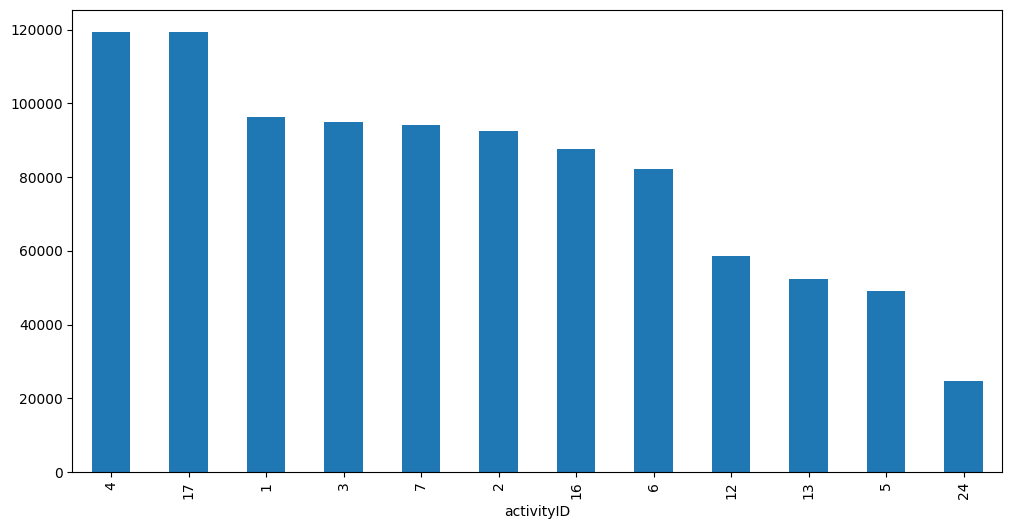

In [81]:
dataCol['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

In [128]:
train_df = dataCol.sample(frac=0.8, random_state=1)
test_df = dataCol.drop(train_df.index)

In [129]:
train_df.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,...,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000,777150.000000
mean,1705.759254,8.077816,107.489170,32.750574,-4.956947,3.587946,3.597050,-4.890773,3.574301,3.781218,...,9.381324,-0.034699,-2.175445,0.009311,-0.036726,0.007930,-31.571062,1.390633,17.255887,4.573027
std,1093.661404,6.172981,27.005449,1.794685,6.254814,6.917336,3.964450,6.257508,6.582990,3.949287,...,6.075029,7.197226,3.478795,1.129064,0.639324,2.014456,18.316113,21.658864,19.642111,2.331226
min,31.220000,1.000000,57.000000,24.875000,-105.695000,-100.679000,-101.452000,-61.039800,-61.841700,-61.934700,...,-61.142000,-61.906400,-62.314800,-23.995000,-18.126900,-14.019600,-171.691000,-137.549000,-102.232000,1.000000
25%,744.332500,3.000000,86.000000,31.687500,-8.974070,1.058535,1.156790,-8.869768,1.063390,1.356772,...,8.409560,-2.072237,-3.399910,-0.208465,-0.106890,-0.442281,-41.699600,-12.491800,3.834537,2.000000
50%,1482.070000,6.000000,104.909091,33.125000,-5.453830,3.529410,3.426040,-5.383690,3.572075,3.657990,...,9.551025,-0.214378,-1.993740,0.004655,-0.003933,-0.002234,-34.006100,0.780330,18.793900,5.000000
75%,2664.397500,13.000000,124.000000,34.062500,-0.961002,6.455258,6.530335,-0.907664,6.458197,6.774870,...,10.288175,1.922310,-0.596151,0.131161,0.115628,0.092055,-17.900575,17.841300,31.186700,7.000000
max,4245.630000,24.000000,202.000000,35.500000,60.912600,155.526000,141.100000,46.211000,62.259800,61.728000,...,61.947200,62.046100,53.079100,16.442700,13.163500,16.528800,91.247700,94.247800,146.900000,9.000000


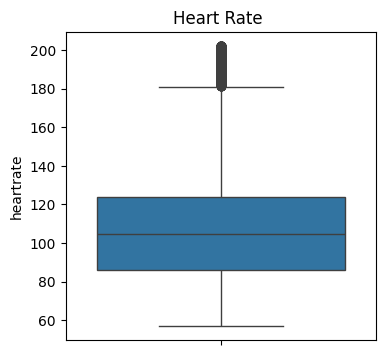

In [121]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train_df["heartrate"])

<Axes: xlabel='activityID'>

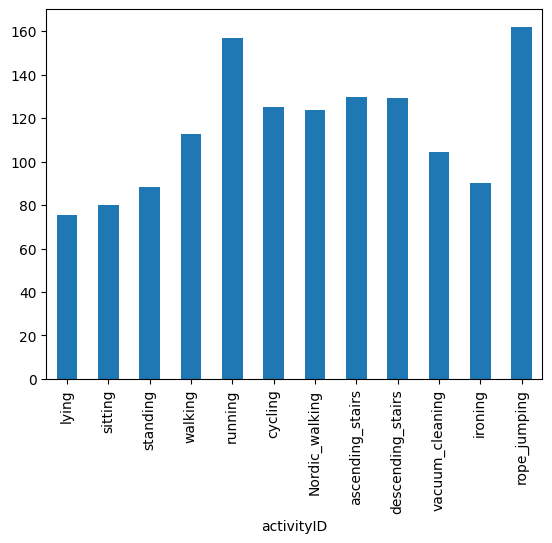

In [97]:
df_hr_act = train_df['heartrate'].groupby(train_df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

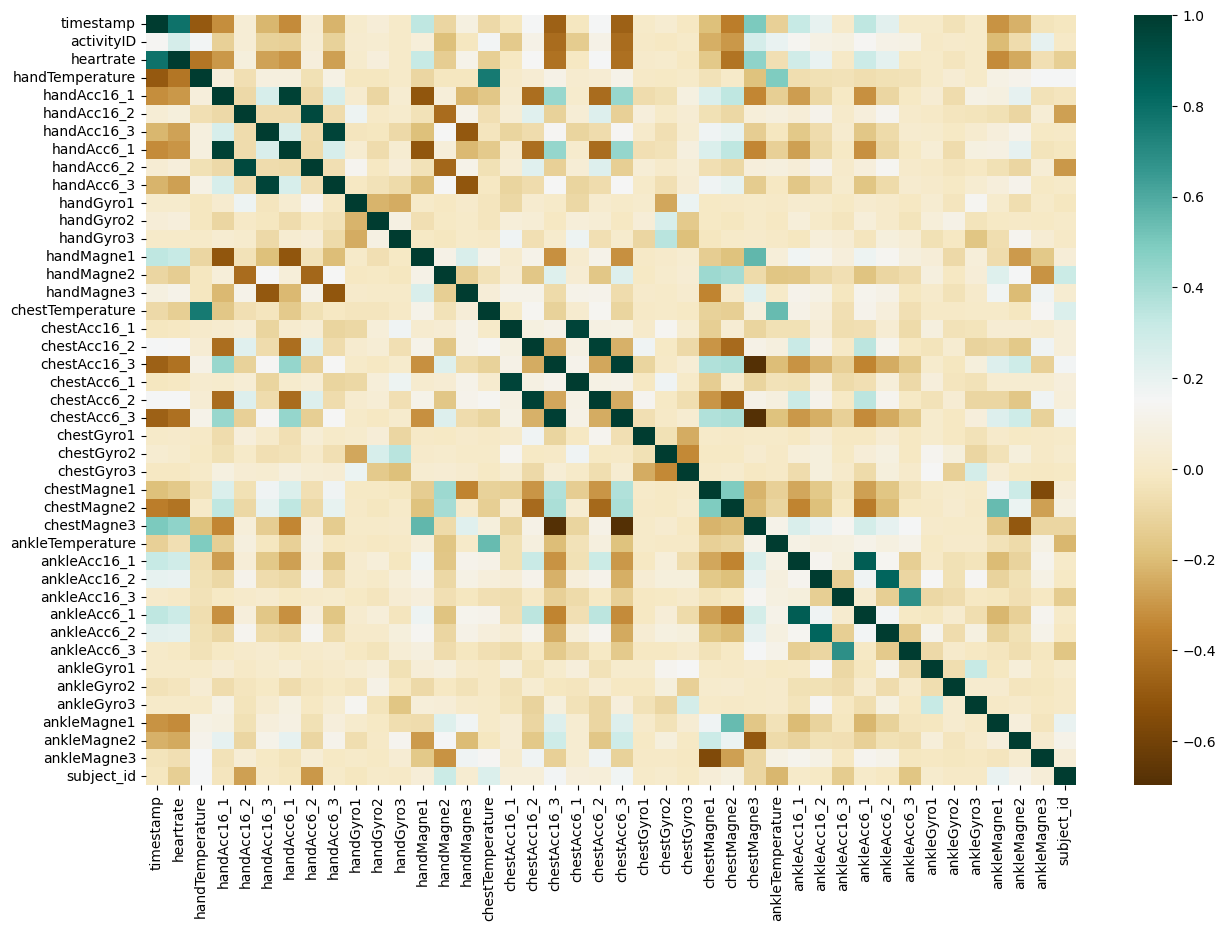

In [98]:
from pandas.plotting import scatter_matrix
df_corr = train_df.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [130]:
running_data = train_df.loc[(train_df["activityID"] == 5)]
ropejumping_data = train_df.loc[(train_df["activityID"] == 24)]
cumbersome_data = running_data + ropejumping_data

In [131]:
import scipy.stats

p = train_df['heartrate'].mean() / (running_data['heartrate'].std() / math.sqrt( running_data['heartrate'].count() ))
pValue = 1 - scipy.stats.norm.cdf(p)

if pValue > 0.1:
    print("The p_value is ", pValue, " and h1 is rejected. There is no mass difference between the means of cumbersome activities and all activities.")
else:
    print("The p_value is ", pValue, " and h0 is rejected. There is mass difference between the means of cumbersome activities and all activities.")


The p_value is  0.0  and h0 is rejected. There is mass difference between the means of cumbersome activities and all activities.


In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [133]:
train_df = train_df.drop(["timestamp", "subject_id"],axis=1)
test_df1 = test_df.drop(["timestamp", "subject_id"],axis=1)

In [134]:
train_df.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
946339,17,104.0,33.6250,-2.35856,4.19581,7.418670,-2.32642,4.40503,7.370770,-0.448717,...,-2.61988,9.59201,0.256183,-2.17731,0.072883,0.002290,0.002218,-40.90930,11.04120,48.19800
293719,4,99.0,31.4375,-9.09315,3.31604,0.739421,-9.03312,3.57155,0.991836,0.016489,...,-1.96062,9.74553,-0.075531,-1.35976,0.004026,0.035391,-0.018922,-27.97410,5.12319,6.55172
347927,4,94.0,31.7500,-13.76280,6.80268,0.426787,-13.85630,7.50240,0.595538,-2.282180,...,-4.00714,9.29830,0.994738,-4.22138,-2.014560,0.356247,-0.448180,-55.17680,-10.15300,-1.89435
238944,3,99.0,33.3125,-9.20096,2.26766,2.203860,-9.10644,2.32000,2.504730,-0.011012,...,-3.08816,9.46989,0.739543,-2.67768,-0.010855,-0.006011,0.009009,-5.26432,-19.40990,17.15560
444207,5,164.0,30.7500,-9.68944,-4.34695,0.371467,-10.06660,-4.28959,0.677899,1.050350,...,-2.05458,13.71530,-9.046290,-3.41037,-2.141910,0.782340,-0.040409,-44.48440,-42.79240,20.89710


In [135]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = train_df.copy()
df_scaled_test = test_df1.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
946339,17,-0.023923,0.210526,0.386278,0.123482,0.743016,0.383978,0.154399,0.685255,-0.620416,...,-0.071489,0.021817,0.117801,-0.065473,0.200893,0.027970,0.008331,-0.290062,0.338273,1.075019
293719,4,-0.155502,-0.710526,-0.454173,-0.039537,-0.499971,-0.458350,-0.000097,-0.492083,0.031564,...,0.167009,0.103536,0.034759,0.226118,-0.001852,0.176724,-0.031231,0.253456,0.143172,-0.447576
347927,4,-0.287081,-0.578947,-1.036927,0.606529,-0.558152,-1.064117,0.728539,-0.565226,-3.189990,...,-0.573353,-0.134527,0.302692,-0.794519,-5.945415,1.618659,-0.834581,-0.889562,-0.360442,-0.756366
238944,3,-0.155502,0.078947,-0.467627,-0.233799,-0.227444,-0.467559,-0.232089,-0.212853,-0.006977,...,-0.240897,-0.043189,0.238806,-0.243937,-0.045667,-0.009335,0.021041,1.207687,-0.665617,-0.059897
444207,5,1.555024,-1.000000,-0.528588,-1.459471,-0.568447,-0.588150,-1.457265,-0.550025,1.480507,...,0.133018,2.216673,-2.210992,-0.505261,-6.320387,3.533531,-0.071444,-0.440283,-1.436475,0.076893


In [137]:
# Training Dataset
X_train = df_scaled.drop('activityID', axis=1)  # Remains as a DataFrame
y_train = df_scaled['activityID']               # Remains as a Series

# Test Dataset
X_test = df_scaled_test.drop(['activityID'], axis=1)   # Remains as a DataFrame

y_test = df_scaled_test['activityID']                # Remains as a Series
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [115]:
test_df.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [138]:
test_df.head()
y_test.head()

5     1
12    1
25    1
37    1
40    1
Name: activityID, dtype: int64

In [139]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test separately to map to consecutive labels starting from 0
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


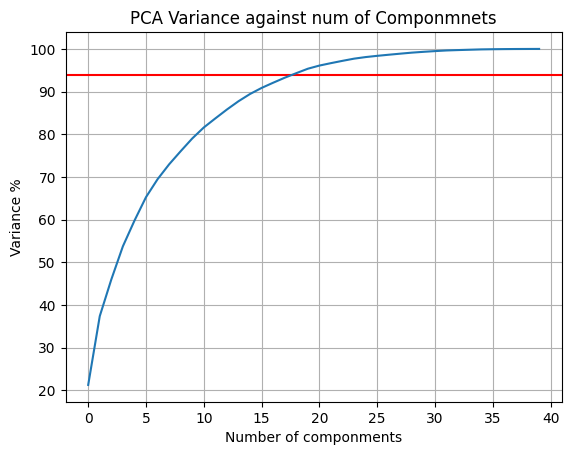

In [112]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

In [ ]:

'''
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
'''

'\npca = PCA(n_components=17)\nX_train=pca.fit_transform(X_train)\nX_test=pca.fit_transform(X_test)\n'

In [140]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",err)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    #print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,err,p,r,f1) )
    

log_reg = LogisticRegression()
log_reg.fit(X=X_train, y=y_train )
y_pred_lr = log_reg.predict(X_test)
get_metrics(y_test, y_pred_lr)

C:\Users\bhavinj.msdsm01\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8163593035046092
Error:  0.18364069649539083
Precision 0.7932307152726349
Recall 0.7809611672324149
F1 0.7858077936602164


In [141]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
lgbm = LGBMClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train LightGBM
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)

# Evaluate LightGBM
print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, lgbm_preds))
print("Precision:", precision_score(y_test, lgbm_preds, average='weighted'))
print("Recall:", recall_score(y_test, lgbm_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, lgbm_preds, average='weighted'))

# Train XGBoost
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds, average='weighted'))
print("Recall:", recall_score(y_test, xgb_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, xgb_preds, average='weighted'))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9741
[LightGBM] [Info] Number of data points in the train set: 777150, number of used features: 40
[LightGBM] [Info] Start training from score -2.311698
[LightGBM] [Info] Start training from score -2.350731
[LightGBM] [Info] Start training from score -2.324966
[LightGBM] [Info] Start training from score -2.096015
[LightGBM] [Info] Start training from score -2.981411
[LightGBM] [Info] Start training from score -2.469576
[LightGBM] [Info] Start training from score -2.332999
[LightGBM] [Info] Start training from score -2.806273
[LightGBM] [Info] Start training from score -2.917488
[LightGBM] [Info] Start training from score -2.406210
[LightGBM] [Info] Start training from score -2.100336
[LightGBM] [Info] Start training from score -3.670709
LightGBM Performance:
Accuracy: 0.9812854179641458
Precision: 

C:\Users\bhavinj.msdsm01\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.9926397545898593
Precision: 0.9927278221686548
Recall: 0.9926397545898593
F1 Score: 0.9926606374443463


In [ ]:
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)

C:\Users\bhavinj.msdsm01\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [154]:
from sklearn.metrics import classification_report
y_pred = xgb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19228
           1       1.00      1.00      1.00     18564
           2       1.00      0.99      0.99     19221
           3       0.99      1.00      0.99     23542
           4       1.00      1.00      1.00      9680
           5       1.00      1.00      1.00     16538
           6       1.00      1.00      1.00     18711
           7       0.98      0.95      0.96     11914
           8       0.97      0.97      0.97     10491
           9       0.98      1.00      0.99     17316
          10       0.99      0.99      0.99     24188
          11       1.00      1.00      1.00      4894

    accuracy                           0.99    194287
   macro avg       0.99      0.99      0.99    194287
weighted avg       0.99      0.99      0.99    194287



In [ ]:
# For multi-class, ensure you use the right method to get probabilities
predictions = xgb.predict_proba(X_test)  # This will give probabilities for each class

# Now use argmax
predicted_classes = np.argmax(predictions, axis=1)  # Assuming multi-class probabilities


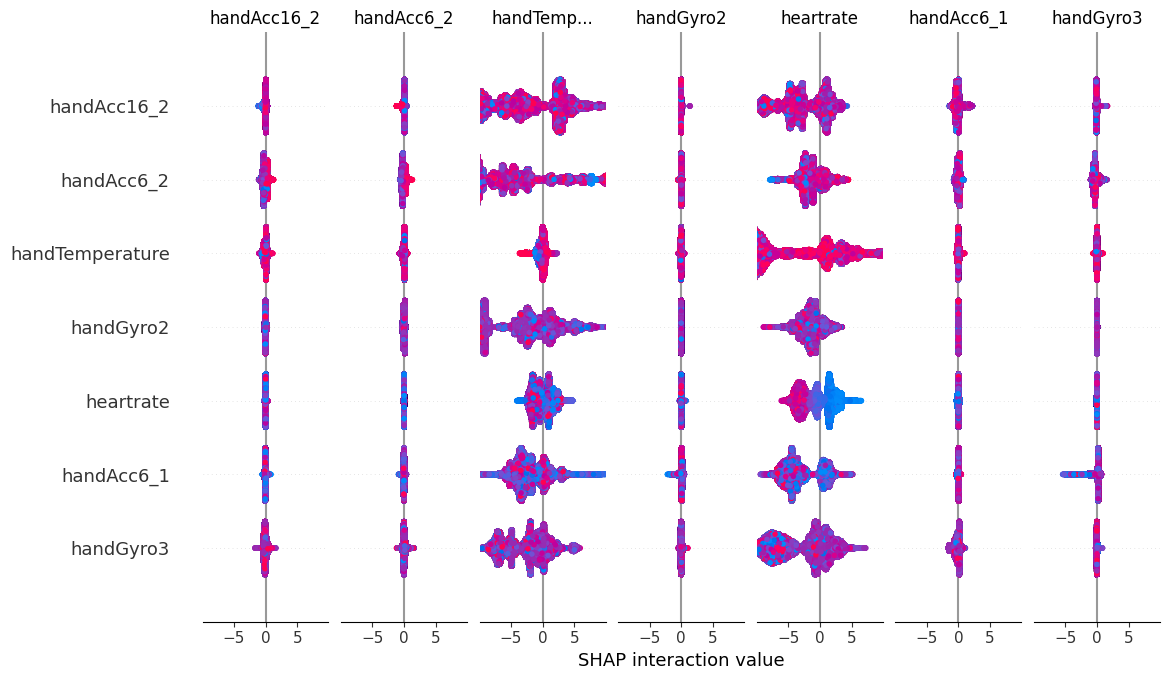

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
#shap.summary_plot(shap_values[0], X_test)

In [ ]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
'''
import shap
import numpy as np

# Initialize SHAP explainer with the trained LightGBM model
explainer = shap.TreeExplainer(lgbm)

# Calculate SHAP values for the entire test set, returns a list of arrays for each class
shap_values = explainer.shap_values(X_test)

# Use the unique values from y_train (as a Series) to get class names directly
class_names = y_train.unique()

# Dictionary to store feature importance for each class
class_importance = {}

for class_index, class_name in enumerate(class_names):
    # Get SHAP values for the current class
    class_shap_values = shap_values[class_index]
    
    # Calculate mean absolute SHAP values across samples to find feature importance
    class_feature_importance = np.abs(class_shap_values).mean(axis=0)
    
    # Store the feature importance in a dictionary
    class_importance[class_name] = class_feature_importance

    # Display top features for each activity class
    print(f"Top features for activity class '{class_name}':")
    top_features = np.argsort(class_feature_importance)[-10:]  # Top 10 features
    for feature in reversed(top_features):
        print(f"Feature: {X_test.columns[feature]}, Importance: {class_feature_importance[feature]:.4f}")
    print("\n")
    '''

'\nimport shap\nimport numpy as np\n\n# Initialize SHAP explainer with the trained LightGBM model\nexplainer = shap.TreeExplainer(lgbm)\n\n# Calculate SHAP values for the entire test set, returns a list of arrays for each class\nshap_values = explainer.shap_values(X_test)\n\n# Use the unique values from y_train (as a Series) to get class names directly\nclass_names = y_train.unique()\n\n# Dictionary to store feature importance for each class\nclass_importance = {}\n\nfor class_index, class_name in enumerate(class_names):\n    # Get SHAP values for the current class\n    class_shap_values = shap_values[class_index]\n    \n    # Calculate mean absolute SHAP values across samples to find feature importance\n    class_feature_importance = np.abs(class_shap_values).mean(axis=0)\n    \n    # Store the feature importance in a dictionary\n    class_importance[class_name] = class_feature_importance\n\n    # Display top features for each activity class\n    print(f"Top features for activity clas

In [ ]:
#print(f"SHAP values shape for class '{class_name}': {class_shap_values.shape}")
#print(f"X_test shape: {X_test.shape}")


In [ ]:
# Visualize SHAP summary plot for each class
#for class_index, class_name in enumerate(class_names):
#    print(f"SHAP Summary Plot for Activity Class '{class_name}'")
#    shap.summary_plot(shap_values[class_index], X_test, feature_names=X_test.columns, show=False)


In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
get_metrics(y_test,y_pred_rf)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nrfc = RandomForestClassifier(n_jobs =4)\nrfc.fit(X_train,y_train)\ny_pred_rf = rfc.predict(X_test)\nget_metrics(y_test,y_pred_rf)\n'

In [ ]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression(),
               RandomForestClassifier(n_jobs =4)]

score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
    
    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#     r = recall_score(y_true, y_pred, average=None).mean()
#     f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)
'''

'\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import cross_val_predict\n\nclassifiers = [LogisticRegression(),\n               RandomForestClassifier(n_jobs =4)]\n\nscore_lst = []\nfor cls in classifiers:\n    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy \n    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error\n    score = np.sqrt(-scores)\n    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)\n    \n    \n    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)\n#     r = recall_score(y_true, y_pred, average=None).mean()\n#     f1 = f1_score(y_true, y_pred, average=None).mean()\n    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])\n\ndf_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)\ndisplay(df_scores)\n'

In [ ]:
# Set a threshold for heart rate (e.g., 200)
heart_rate_threshold = 201
heart_rate_anomalies = dataCol[dataCol["heartrate"] > heart_rate_threshold]

# Set a threshold for acceleration (example for one sensor)
acceleration_threshold = 50  # Assuming a certain unit of measurement
acceleration_anomalies = dataCol[(dataCol["handAcc6_1"] > acceleration_threshold) |
                                 (dataCol["handAcc6_2"] > acceleration_threshold) |
                                 (dataCol["handAcc6_3"] > acceleration_threshold)]

print(f"Number of heart rate anomalies: {len(heart_rate_anomalies)}")
print(f"Number of acceleration anomalies: {len(acceleration_anomalies)}")


Number of heart rate anomalies: 56
Number of acceleration anomalies: 1939


In [149]:
print("Length of test_df['subject_id']: ", len(test_df['subject_id']))
print("Length of test_df['activityID']: ", len(test_df['activityID']))
print("Length of y_test: ", len(y_test))
print("Length of xgb_predictions: ", len(xgb_preds))
print("Length of lgbm_predictions: ", len(lgbm_preds))


Length of test_df['subject_id']:  194287
Length of test_df['activityID']:  194287
Length of y_test:  194287
Length of xgb_predictions:  194287
Length of lgbm_predictions:  194287


In [146]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of test_df: {test_df.shape}")


Shape of X_test: (194287, 40)
Shape of y_test: (194287,)
Shape of test_df: (194287, 43)


In [ ]:
# Reset index for test_df and predictions to align them
test_df = test_df.reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)
xgb_predictions = pd.Series(xgb_preds).reset_index(drop=True)
lgbm_predictions = pd.Series(lgbm_preds).reset_index(drop=True)

# Create a DataFrame to store actual labels, predicted labels, subject ID, and activity ID
results_df = pd.DataFrame({
    'subject_id': test_df['subject_id'],  # Correctly referencing 'subject_id'
    'activityID': test_df['activityID'],  # Correct column name 'activityID'
    'actual_activity': y_test,            # Reset index for y_test
    'xgb_predicted_activity': xgb_predictions,  # Reset index for xgb_predictions
    'lgbm_predicted_activity': lgbm_predictions  # Reset index for lgbm_predictions
})

# Identify anomalies where the predicted activity doesn't match the actual activity
xgb_anomalies = results_df[results_df['xgb_predicted_activity'] != results_df['actual_activity']]
lgbm_anomalies = results_df[results_df['lgbm_predicted_activity'] != results_df['actual_activity']]

# Combine anomalies from both models to create a unified list of anomalies
combined_anomalies = pd.concat([xgb_anomalies, lgbm_anomalies]).drop_duplicates()

# Output the anomalies: which subject, which activity had anomalies
print("Anomalies detected:")
print(combined_anomalies[['subject_id', 'activityID', 'actual_activity', 'xgb_predicted_activity', 'lgbm_predicted_activity']])


Anomalies detected:
        subject_id  activityID  actual_activity  xgb_predicted_activity  \
422              6           1                0                       2   
6373             6           1                0                       9   
9035             1           1                0                       1   
24351            8           2                1                       2   
24353            8           2                1                       7   
...            ...         ...              ...                     ...   
166969           7          17               10                      10   
167276           4          17               10                      10   
167536           8          17               10                      10   
173672           5          17               10                      10   
187026           3          17               10                      10   

        lgbm_predicted_activity  
422                           0  
6373       

In [153]:
test_df.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'chestTemperature', 'chestAcc16_1',
       'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
       'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
       'chestMagne2', 'chestMagne3', 'ankleTemperature', 'ankleAcc16_1',
       'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2',
       'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1',
       'ankleMagne2', 'ankleMagne3', 'subject_id'],
      dtype='object')

In [171]:
import numpy as np
import pandas as pd

# Define the feature columns to be used (excluding 'heartrate' and any other non-feature columns)
features = [
    'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'chestTemperature', 'chestAcc16_1',
       'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
       'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
       'chestMagne2', 'chestMagne3', 'ankleTemperature', 'ankleAcc16_1',
       'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2',
       'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1',
       'ankleMagne2', 'ankleMagne3'
]

# Predict heart rate using the trained XGB model
X0 = test_df[features]  # Selecting features from test_df
predictions = xgb.predict(X0)
predicted_heartrate=X0['heartrate']
#print(predicted_heartrate)
# Calculate residuals (absolute errors)
actual_heartrate = test_df['heartrate']
residuals = np.abs(actual_heartrate - predicted_heartrate)
#print(residuals)
# Define a threshold for anomaly detection (mean + 3 * std deviation of residuals)
threshold = 200

# Flag anomalies where residuals exceed the threshold
test_df['is_anomaly'] = predicted_heartrate > threshold
test_df['predicted_heartrate'] = predicted_heartrate
test_df['residual'] = residuals

# Output detected anomalies
anomalies = test_df[test_df['is_anomaly']]
print("Anomalies detected in heart rate:")
print(anomalies[['timestamp', 'heartrate', 'predicted_heartrate', 'residual', 'is_anomaly']])


Anomalies detected in heart rate:
        timestamp  heartrate  predicted_heartrate  residual  is_anomaly
189474    3887.17      201.0                201.0       0.0        True
189504    3884.21      201.0                201.0       0.0        True
189511    3880.22      201.0                201.0       0.0        True
189585    3883.50      201.0                201.0       0.0        True
189605    3887.08      201.0                201.0       0.0        True
...           ...        ...                  ...       ...         ...
193903    3887.24      201.0                201.0       0.0        True
194108    3881.09      201.0                201.0       0.0        True
194141    3880.39      201.0                201.0       0.0        True
194202    3883.37      201.0                201.0       0.0        True
194244    3882.15      201.0                201.0       0.0        True

[81 rows x 5 columns]
